In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd
import seaborn as sns
import pandas as pd
from helpers import sns_styleset
%matplotlib inline

In [2]:
sns_styleset()

In [3]:
skeleton_data=loadmat('./data/Skeletons_HC_BC_cones.mat')
skeleton_ids=skeleton_data['kn_allSkeletons_e2006_IDs'].flatten()
skeletons=skeleton_data['kn_allSkeletons_e2006'].flatten()
M=np.loadtxt('./data/coordinate_rotation')
BC_ids=np.loadtxt('./data/BC_IDs_new').astype(int)

In [4]:
#Load contact data and select contacts between HCs and cones
contact_data=loadmat('./data/HC_BC_cones_contacts.mat')['kn_allContactData_Interfaces']

contact_data_reduced=contact_data[(contact_data[:,4]>64) & (contact_data[:,4]<192) &
                                  (contact_data[:,5]>64) & (contact_data[:,5]<192) &
                                  (contact_data[:,6]>64) & (contact_data[:,6]<192),:]

contact_data_reduced2=np.hstack((contact_data_reduced[:,:2],
                                (contact_data_reduced[:,4]+contact_data_reduced[:,11]+64).reshape(-1,1),\
                                (contact_data_reduced[:,5]+contact_data_reduced[:,12]+64).reshape(-1,1),\
                                (contact_data_reduced[:,6]+contact_data_reduced[:,13]+64).reshape(-1,1)))
                                
contact_data_HC_cones=contact_data_reduced2[(contact_data_reduced2[:,0]>1900)&\
                                            (contact_data_reduced2[:,0]<2000)&(contact_data_reduced2[:,1]>2000)]
contact_data_HC_cones[:,2:]*=[16.5,16.5,25]  # to nm
contact_data_HC_cones[:,2:]=np.dot(M,contact_data_HC_cones[:,2:].T).T  # rotation to align the light axis

In [5]:
# load upper and lower bounds of cone axon terminals
cone_bounds=np.loadtxt('./data/cone_boundaries_rotated.txt')
cone_bounds[:,1:]*=50

In [6]:
# load bulb data
bulb_positions=pd.read_csv('./data/HC_bulb_contacts.csv',delimiter=';')[['HC','x','y','z']]
bulb_positions.iloc[:,1:]=bulb_positions.iloc[:,1:]*[16.5,16.5,25]
bulb_positions.iloc[:,1:]=np.dot(M,bulb_positions.iloc[:,1:].T).T

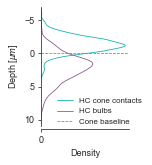

In [7]:
plt.figure(figsize=(5/2.54,6/2.54), tight_layout = True)
ax=sns.kdeplot(y=(contact_data_HC_cones[:,2]-np.mean(cone_bounds[:,2]))/1000,c=(0,0.68,0.68),label='HC cone contacts')
sns.kdeplot(y=(bulb_positions.iloc[:,1].values-np.mean(cone_bounds[:,2]))/1000,c=(0.5,0.3,0.5),label='HC bulbs')
plt.axhline(y=0,linestyle='dashed',c='grey',label='Cone baseline')
ax.spines['bottom'].set_position(('outward',3))
sns.despine()
plt.xticks([0])
plt.yticks([-5,0,5,10])
plt.ylim(11,-7)
plt.legend(loc='lower left',bbox_to_anchor=(0.1,-0.05),frameon=False)
plt.ylabel('Depth [$\mu m$]')
plt.xlabel('Density')
# plt.savefig('./figures/Fig2D_bulb_vs_cone_contacts.svg',dpi=300)
plt.show()